## step 0. 머신러닝 프로젝트의 큰 틀

< 머신러닝 프로젝트의 큰 틀 >
1. 모델의 목적 살펴보기, 큰 그림 그리기

2. 사용 데이터 구하기

3. 데이터에 대해 살펴보기 (EDA)

4. 데이터 전처리하기 (알고리즘을 위한 데이터 처리)

5. 모델 선택 및 Train

6. 초기 모델을 발전시키며 모델 수정

7. 솔루션 제시 및 유지 보수

##Step 1. 목적 살펴보기, 큰그림 그리기

주제 : 뉴욕에서 방이 둘 딸린 집을 에어비엔비에 내놓으려 한다.
 이 때 적당한 숙박료를 구하시오.

----------
데이터 소개 : New York City Airbnb Open Data

    - 각 파일의 컬럼은 아래와 같습니다.
    id: 항목의 ID
    name: 항목의 이름 (타이틀)
    host_id: 호스트 ID
    host_name: 호스트의 이름
    neighbourhood_group: 방이 있는 구역 그룹
    neighbourhood: 방이 있는 구역
    latitude: 방이 위치한 위도
    longitude: 방이 위치한 경도
    room_type: 방의 종류
    price: 가격 (미 달러)
    minimum_nights: 최소 숙박 일수
    number_of_reviews: 리뷰의 개수
    last_review: 마지막 리뷰 일자
    reviews_per_month: 월별 리뷰 개수
    calculated_host_listings_count: 호스트가 올린 방 개수
    availability_365: 365일 중 가능한 일수
---

### 문제 0.Train data와 target data는 무엇이 되어야할지 스스로 정의내린 후에 step 2로 넘어가세요!

In [ ]:
target data : price 
train data : others 

## Step 2. 데이터셋 준비하기

In [28]:
#기본적인 Library 불러오기
#아래 Library를 처음보신다면 각각 어떤 역할을 하는지 대략적으로 찾아보세요!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 문제 1. Pandas 라이브러리로 csv파일 읽어들이기


In [29]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
PATH = "/content/drive/MyDrive/2주차_과제"
df = pd.read_csv(PATH+"/AB_NYC_2019.csv")

## Step 3. 데이터에 대해 살펴보기 (EDA 및 데이터 기초 통계 분석)


### 문제 2-1. 데이터 구조 살펴보기

In [31]:
# DataFrame에서 제공하는 Method를 이용하여 각 데이터프레임의 구조 분석하기 (head(), info())
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

수치형 데이터 : id , host_id, latitude, logitude, price, minimum_nights, number_of_reviews, reviews_per_month, calcuated_host_listings_count, availability_365

나머지는 categorical object

### 문제 2-2. 'room_type' 변수에 어떤 종류가 있는지 살펴보기

In [33]:
# value_counts()

df["room_type"].value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

###문제 2-3. 기초 통계량 확인해보기

In [34]:
# describe()
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


###문제 3. 각 feature 별로 시각화해서 살펴보기

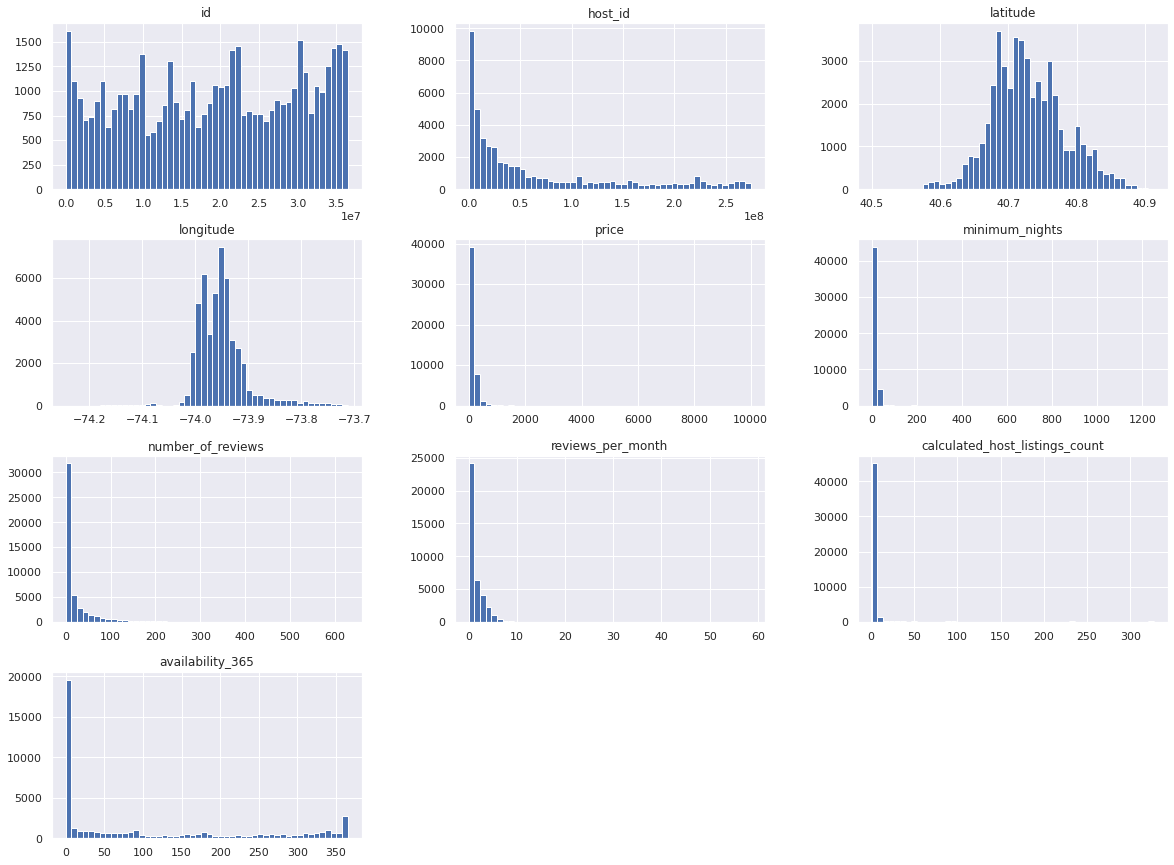

In [35]:
# 기본적인 시각화의 방법은 다양합니다!
# 각자 다양한 방식으로 전처리전 데이터에 대한 시각화를 진행해보세요!

df.hist(bins =50, figsize = (20,15))
plt.show()

각 객실 유형의 비율

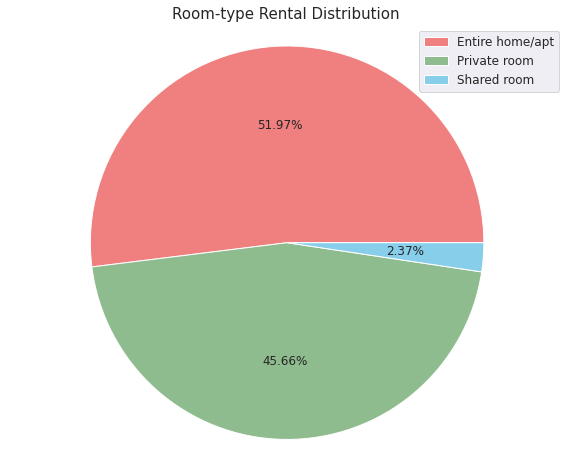

In [36]:
#각 객실 유형의 비율
room_type = df.groupby('room_type')['latitude'].count().reset_index()
room_type.rename(columns={'latitude':'n_rooms'},inplace=True)
plt.figure(figsize=(10,8))
plt.pie(room_type['n_rooms'],autopct='%1.2f%%', colors=['lightcoral', 'darkseagreen','skyblue'])
plt.axis('equal')
plt.legend(labels=room_type['room_type'],loc='best',fontsize='12')
plt.title('Room-type Rental Distribution', fontsize='15')
plt.show()
plt.close()

위치별 리뷰가 많은 숙소

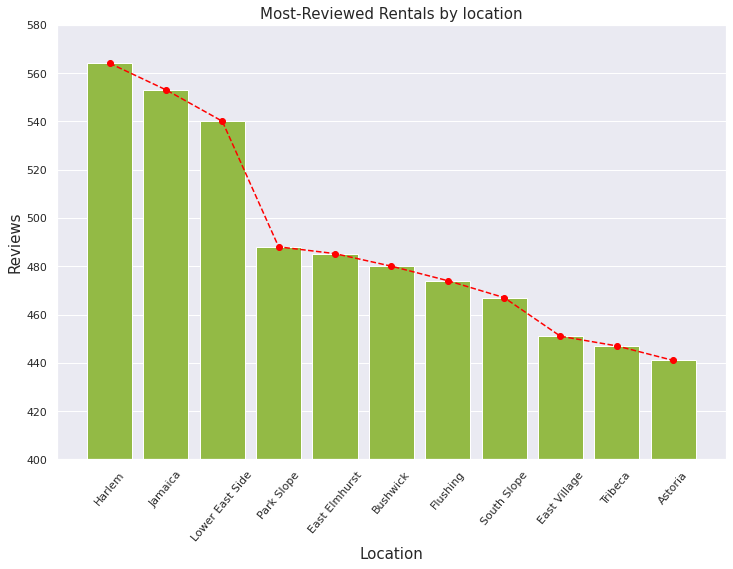

In [37]:
# 위치별 리뷰가 많은 숙소
review = df.sort_values('number_of_reviews',ascending=False)
top_reviewed = review.loc[:,['neighbourhood','number_of_reviews']][:20]
top_reviewed = top_reviewed.groupby('neighbourhood').mean().sort_values('number_of_reviews',ascending=False).reset_index()
fig4,ax3 = plt.subplots(figsize=(12,8))
sns.barplot(x=top_reviewed['neighbourhood'],y=top_reviewed['number_of_reviews'].values,color='yellowgreen',ax=ax3)
plt.plot(top_reviewed['number_of_reviews'], marker='o', color='red',linestyle='--')
plt.ylabel('Reviews', fontsize='15')
plt.xlabel('Location',fontsize='15')
plt.ylim((400,580))
for ax in ax3.get_xticklabels():
  ax.set_rotation(50)
plt.title('Most-Reviewed Rentals by location',fontsize='15')
plt.show()
sns.set()

숙소의 위치

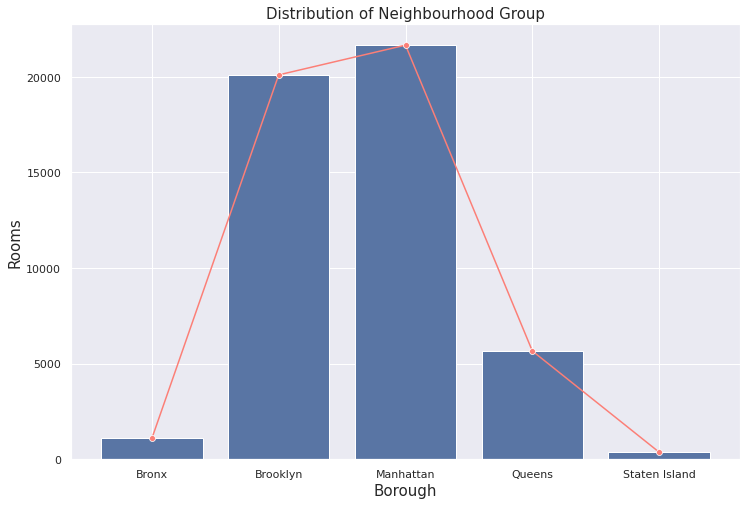

In [38]:
# 숙소의 위치
neighbourhood = df.groupby('neighbourhood_group')['neighbourhood'].count().reset_index()
fig,ax = plt.subplots(figsize=(12,8))
sns.barplot(x=neighbourhood[neighbourhood.columns[0]],
y=neighbourhood[neighbourhood.columns[1]],color='b',ax=ax)
sns.lineplot(x=neighbourhood[neighbourhood.columns[0]],y=neighbourhood[neighbourhood.columns[1]],color='#FC7F77',marker='o',ax=ax)
plt.ylabel('Rooms', fontsize='15')
plt.xlabel('Borough',fontsize='15')
plt.title('Distribution of Neighbourhood Group',fontsize='15')
plt.grid('x')
plt.show()
sns.set()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


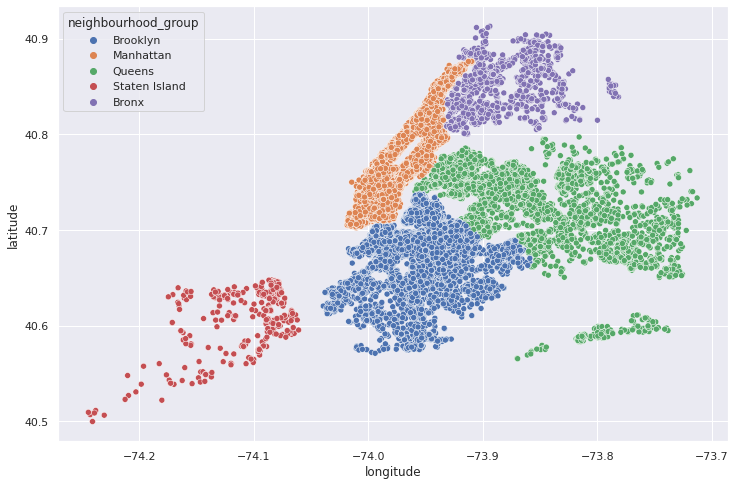

In [39]:
plot_dims=(12,8)
plt.figure(figsize=plot_dims)
sns.scatterplot(df.longitude, df.latitude, hue=df.neighbourhood_group)
plt.ioff()

### 문제 4. 각 feature 별로 결측치가 있는지 살펴보기

결측치 feature :  last_review, reviews_per_month

In [40]:
# 마찬가지로 결측치를 찾는 방법도 다양합니다. 가장 일반적으로 사용하는 method를 힌트로 첨부했습니다.
# 추후 프로젝트를 진행하시면서 스스로 다양한 방식을 사용해보세요!
# { isna().sum(), info() }

incomplete_rows = df[df.isnull().any(axis = 1)]
incomplete_rows.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10074 entries, 2 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              10074 non-null  int64  
 1   name                            10058 non-null  object 
 2   host_id                         10074 non-null  int64  
 3   host_name                       10053 non-null  object 
 4   neighbourhood_group             10074 non-null  object 
 5   neighbourhood                   10074 non-null  object 
 6   latitude                        10074 non-null  float64
 7   longitude                       10074 non-null  float64
 8   room_type                       10074 non-null  object 
 9   price                           10074 non-null  int64  
 10  minimum_nights                  10074 non-null  int64  
 11  number_of_reviews               10074 non-null  int64  
 12  last_review                     

### 문제 5. reviews_per_month와 price의 scatter plot 그리기


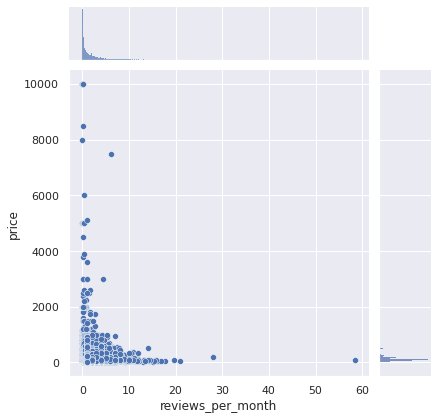

In [41]:
# 어떤 방법을 쓰셔도 상관없습니다.
# sns.jointplot()

sns.jointplot(x=df["reviews_per_month"], y=df["price"], kind='scatter')

### 문제 6. 수치형 데이터와 Price의 상관성 분석하기

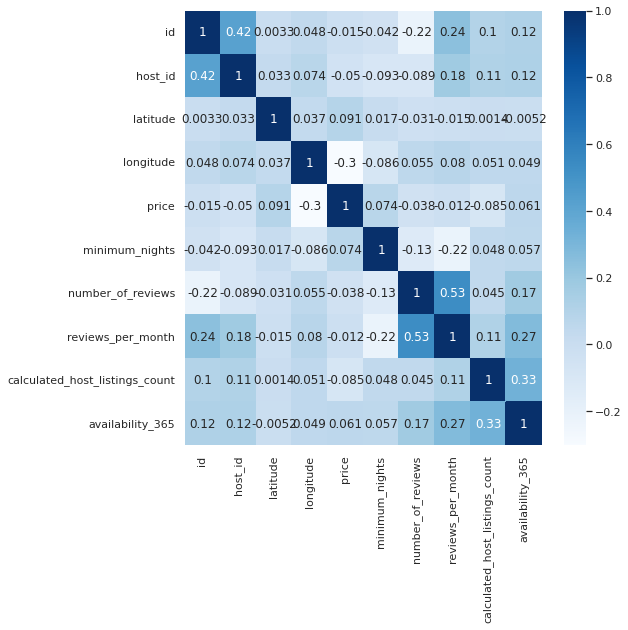

In [42]:
# sns.heatmap()

corr = df.corr(method='kendall')
plt.figure(figsize=(8,8))
sns.heatmap(corr, annot=True, cmap='Blues')

In [43]:
corr["price"].sort_values(ascending = False)

price                             1.000000
latitude                          0.090532
minimum_nights                    0.074233
availability_365                  0.061053
reviews_per_month                -0.012414
id                               -0.015154
number_of_reviews                -0.037926
host_id                          -0.049696
calculated_host_listings_count   -0.085327
longitude                        -0.302361
Name: price, dtype: float64

다중공선성 확인

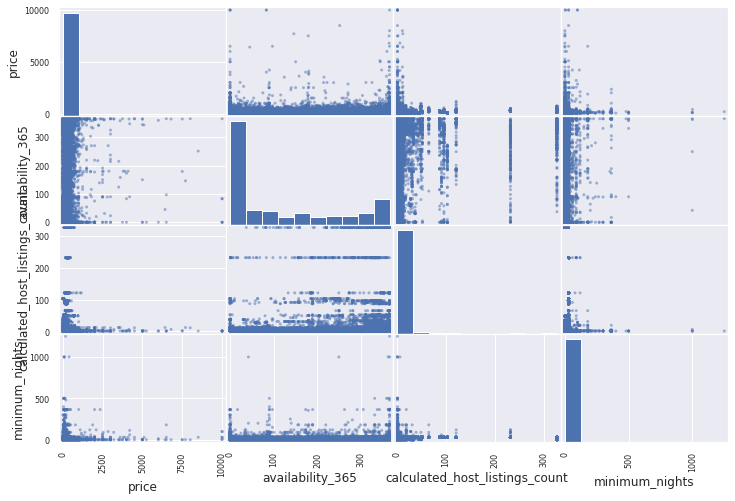

In [44]:
from pandas.plotting import scatter_matrix

attributes = ["price", "availability_365", "calculated_host_listings_count", "minimum_nights"]
scatter_matrix(df[attributes], figsize = (12,8))
plt.show()

### 문제 7. 범주형 데이터와 Price의 Boxplot 계열 및 Histogram 분석하기

In [45]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

범주형 데이터 : name, host_name, neighbourhood_group, neighbourhood, room_type, last_review, 

####문제 7-1. neighbourhood_group 변수와 price 사이의 분포를 boxplot으로 그려보세요.

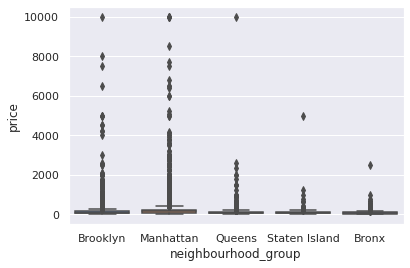

In [46]:
# sns.boxplot()
sns.boxplot(x="neighbourhood_group", y="price",data=df)

####문제 7-2. room_type 변수와 price 사이의 분포를 boxplot으로 그려보세요.

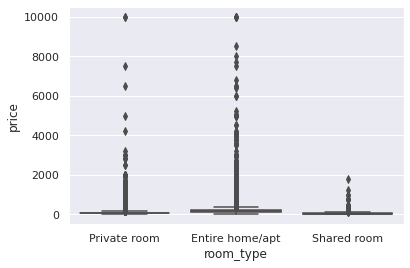

In [47]:
sns.boxplot(x='room_type', y='price', data=df)

## Step 4-1. 데이터 전처리하기

### 문제 8-1. 결측치 처리하기

In [48]:
# 각 컬럼을 분석하여 미기입/오기입된 데이터 확인하기
# Hint) 수치형 데이터는 통계를 이용해서, 범주형 데이터는 unique(), value_counts()등으로 확인
# fill(), dropna() 등으로 미기입된 데이터를 처리하기
# 결측치는 개인적 판단에 따라 drop하셔도 되고, 특정 값으로 채우셔도 됩니다!

#수치형 데이터 칼럼 확인
df.dropna(axis = 0, inplace = True)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38821 entries, 0 to 48852
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              38821 non-null  int64  
 1   name                            38821 non-null  object 
 2   host_id                         38821 non-null  int64  
 3   host_name                       38821 non-null  object 
 4   neighbourhood_group             38821 non-null  object 
 5   neighbourhood                   38821 non-null  object 
 6   latitude                        38821 non-null  float64
 7   longitude                       38821 non-null  float64
 8   room_type                       38821 non-null  object 
 9   price                           38821 non-null  int64  
 10  minimum_nights                  38821 non-null  int64  
 11  number_of_reviews               38821 non-null  int64  
 12  last_review                     

### 문제 8-2. 학습에 필요없는 column이라고 판단된다면 제거하기

In [ ]:
# 'id', 'name', 'host_name', 'latitude', 'longitude' feature를 제거해보세요!
# 각자 판단하여 위 column을 살려서 활용하고, 다른 Column을 제거하셔도 됩니다!
# drop()

df.drop(["id","name", "host_name", "latitude", 'longitude' ], axis = 1, inplace = True)

In [23]:
#df.drop(["last_review"], axis = 1, inplace = True)

### 문제 9. 아웃라이어를 제거하고 통계 재분석하기

In [52]:
# quantile(), drop() 등 메소드를 이용하여 outlier 제거하고 통계 재분석하기
# 예시 코드를 제공하겠습니다!
# 기본 코드니까 이게 반드시 정답인건 아니고, 이런식으로 파이썬으로 데이터 전처리를 한다 정도로만 보시면 될 것 같아요

In [53]:
p1 = df['price'].quantile(0.95)
p2 = df['price'].quantile(0.05)
print(p1, p2)

330.0 40.0


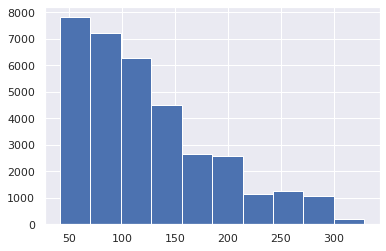

In [54]:
df = df[(df['price'] < p1) & (df['price'] > p2)]
df['price'].hist()

## Step 4-2. 데이터 전처리하기 

### 문제 10. get_dummies를 이용한 범주형 데이터 전처리

In [ ]:
# 어떤 column이 범주형이고, 어떤 column이 수치형인지 스스로 판단해보세요
df.columns

Index(['host_id', 'neighbourhood_group', 'neighbourhood', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [55]:
df_cat = df.select_dtypes(include = ["object"])
df_num = df.select_dtypes(include = [np.number])

print(df_cat.columns, len(df_cat.columns))
print(df_num.columns, len(df_num.columns))

Index(['neighbourhood_group', 'neighbourhood', 'room_type', 'last_review'], dtype='object') 4
Index(['host_id', 'price', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object') 7


In [57]:
# 예시 코드를 제공하겠습니다.
# 코드 그 자체보다 왜 범주형 데이터를 따로 전처리해줘야하는지에 집중해서 공부하세요!

X_cat = df[['neighbourhood_group', 'neighbourhood', 'room_type']]
X_cat = pd.get_dummies(X_cat)
X_cat.head()  #바로 one hot encoding


,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,neighbourhood_Allerton,neighbourhood_Arden Heights,neighbourhood_Arrochar,neighbourhood_Arverne,neighbourhood_Astoria,...,neighbourhood_Williamsbridge,neighbourhood_Williamsburg,neighbourhood_Willowbrook,neighbourhood_Windsor Terrace,neighbourhood_Woodhaven,neighbourhood_Woodlawn,neighbourhood_Woodside,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


### 문제 12. StandardScaler를 이용해 수치형 데이터 표준화하기


In [58]:
from sklearn.preprocessing import StandardScaler

In [59]:
# StandardScaler를 이용해 수치형 데이터를 표준화하기
scaler = StandardScaler()
X_num = df.drop(['neighbourhood_group', 'neighbourhood', 'room_type', 'price','last_review'], axis=1)

scaler.fit(X_num)
X_scaled = scaler.transform(X_num)
X_scaled = pd.DataFrame(X_scaled, index=X_num.index, columns=X_num.columns)


In [60]:
# 범주형 데이터와 수치형 데이터를 단순히 합치는 작업
X = pd.concat([X_scaled, X_cat], axis=1)

# target 변수인 y를 지정해준 작업
y = df['price']

### 문제 13. 학습데이터와 테스트데이터 분리하기


In [63]:
from sklearn.model_selection import train_test_split

In [64]:
# train_test_split() 함수로 학습 데이터와 테스트 데이터 분리하기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =42)

## Step 5. 모델 선택 및 Train

### 문제 14. Regression 모델 종류에 대해 검색해보고 하나 선택하기

In [65]:
from sklearn.ensemble import RandomForestRegressor
model_reg = RandomForestRegressor( random_state = 42)

### 문제 15. 선택한 모델 구현 및 데이터 학습 시키기

In [66]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

def display_scores(scores):
  print("Score:", scores)
  print("Mean : ", scores.mean())
  print("Standard deviation : " , scores.std())
  

In [67]:
model_reg.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [69]:
# Predict를 수행하고 mean_absolute_error, mse 결과 출력하기
pred = model_reg.predict(X_train)
mse = mean_squared_error(y_train, pred)
mae = mean_absolute_error(y_train, pred)
rmse = np.sqrt(mse)
print(mse, mae, rmse)


#trian vs validation
scores = cross_val_score(model_reg, X_train, y_train, scoring = "neg_mean_squared_error", cv = 5)
rmse_scores = np.sqrt(-scores)
display_scores(rmse_scores)

281.4873761584368 11.974161392757646 16.777585528270652
Score: [45.85629323 44.07676414 45.36214315 45.19300559 44.69511588]
Mean :  45.03666440044065
Standard deviation :  0.6066686569175148


### 문제 16. 모델 학습 결과 평가하기

In [70]:
final_pred = model_reg.predict(X_test)

final_mse = mean_squared_error(y_test, final_pred)
final_mae = mean_absolute_error(y_test, final_pred)
final_rmse = np.sqrt(final_mse)

print(final_mse, final_mae, final_rmse)

2008.2930685793458 32.17170296255121 44.8139829582168


## Step 6. 초기 모델을 발전시키며 모델 수정


### 문제 17. 실제 값과 추측 값의 Scatter plot 시각화하기


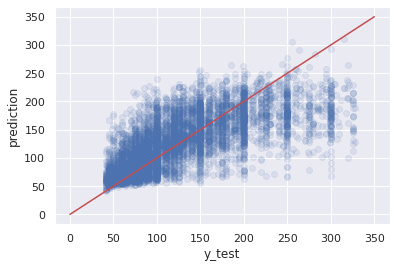

In [71]:
plt.scatter(x=y_test, y=final_pred, alpha=0.1)
plt.plot([0,350], [0, 350], 'r-')
plt.xlabel("y_test")
plt.ylabel("prediction")
plt.show()

### 문제 18. 에러 값의 히스토그램 확인하기


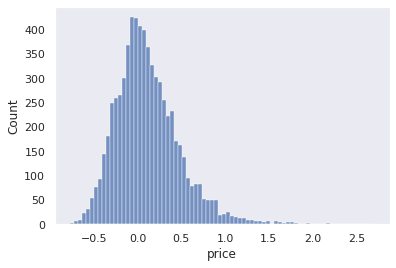

In [72]:
# err의 히스토그램으로 에러율 히스토그램 확인하기
err = (final_pred - y_test) / y_test 
sns.histplot(err)
plt.grid()

### 문제 19. Grid Search 활용해서 모델 수정해보기 

In [73]:
from sklearn.model_selection import GridSearchCV

param_grid =[
             {"n_estimators" : [3,10,30], "max_features" : [2,4,6,8]},
             {"bootstrap" : [False], "n_estimators" : [3,10], "max_features" : [2,3,4]}
]

model_reg = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(model_reg, param_grid, cv = 5, scoring = "neg_mean_squared_error")
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             scoring='neg_mean_squared_error')

In [74]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30, random_state=42)

In [75]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
param_distribs = {
    "n_estimators" : randint(low = 1, high = 200), 
    "max_features" : randint(low = 1, high = 8)
}

model_reg = RandomForestRegressor(random_state = 42)
rnd_search = RandomizedSearchCV(model_reg, param_distributions = param_distribs,
                                n_iter = 18, cv = 5, scoring = "neg_mean_squared_error")
rnd_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_iter=18,
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f61083c8c40>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f61083bfe50>},
                   scoring='neg_mean_squared_error')

In [76]:
rnd_search.best_estimator_

RandomForestRegressor(max_features=3, n_estimators=172, random_state=42)

### 문제 20. 다시 한번 결과 확인하기

In [77]:
grid_final_model =grid_search.best_estimator_
rand_final_model = rnd_search.best_estimator_

grid_final_predictions = grid_final_model.predict(X_test)
grid_final_mse = mean_squared_error(y_test,grid_final_predictions)
grid_final_rmse = np.sqrt(grid_final_mse)


rand_final_predictions = rand_final_model.predict(X_test)
rand_final_mse = mean_squared_error(y_test,rand_final_predictions)
rand_final_rmse = np.sqrt(rand_final_mse)
print("gridsearch : ",  grid_final_rmse, "randomsearch : ", rand_final_rmse)

gridsearch :  44.38623483514789 randomsearch :  43.9998115045044


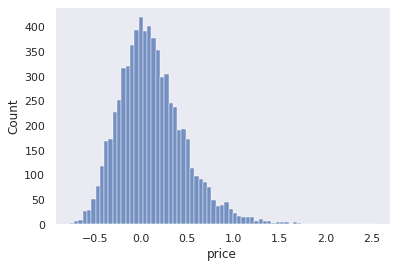

In [78]:
error = (rand_final_predictions - y_test) / y_test
sns.histplot(error)
plt.grid()
plt.show()

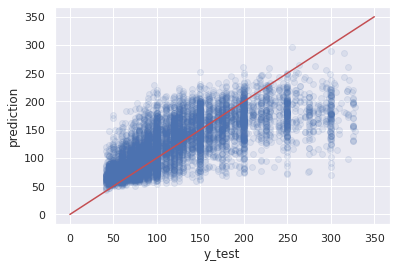

In [79]:
plt.scatter(x=y_test, y=rand_final_predictions, alpha=0.1)
plt.plot([0,350], [0, 350], 'r-')
plt.xlabel("y_test")
plt.ylabel("prediction")
plt.show()